### Trabalho de SAD  
### Aluno: Samuel Benevides de Barros      matrícula:   0050010918
### Professor: Alex Salgado


# Tarefa simples de Classificação

Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/03_getting_started_with_iris.ipynb

1 - importar os modulos python para machine learn e carregar o arquivo fruit_data_with_colors.csv usando o método read_csv do pandas

In [2]:
import pandas as pd
fruits = pd.read_excel('fruit_data_with_colors2.xlsx')

2 - Exibir os primeiros registros desta tabela

In [62]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Machine learning terminology
Each row is an observation (also known as: sample, example, instance, record)
Each column is a feature (also known as: predictor, attribute, independent variable, input, regressor, covariate)

3.1 - Quantas observações têm nessa base de dados?  
3.2 - Quantas "features" têm nessa base de dados?

In [87]:
print('OBSERVAÇÕES/FEATURES: '+ str(fruits.shape))

OBSERVAÇÕES/FEATURES(59, 7)


Each value we are predicting is the response (also known as: target, outcome, label, dependent variable)
Classification is supervised learning in which the response is categorical
Regression is supervised learning in which the response is ordered and continuous

4.1 - Quantas respostas temos nessa base?  
4.2 - Para fazer nossas previsões em cima desta base, devemos usar algoritmo de Classificação ou Regressão?  

In [90]:
print('RESPOSTAS: '+ str(len(fruits)))
print('CLASSIFICAÇÃO. Pois as respostas são categóricas')

RESPOSTAS: 59


# store feature matrix in "X"
X = ???

# store response vector in "y"
y = ???

5 - Como você pode gerar a matriz X de feature e o vetor y de respostas?

In [95]:
X = fruits[['mass','width', 'height']]
y = fruits['fruit_label'];

## Training a machine learning model with scikit-learn


K-nearest neighbors (KNN) classification  
6.1 - Usando o algoritmo de KNN (com 1 vizinho, k=1), qual a previsão? Adivinhe qual é a fruta com massa 20g, largura 4.3 cm, altura 5.5 cm, ou seja, com as seguintes features (mass = 20,	width=4.3,	height=5.5).


Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/04_model_training.ipynb



In [134]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=1)

Knn.fit(X,y)

pred = Knn.predict([[20, 4.3, 5.5]])

print('KNN 1 - FRUTA: '+fruits['fruit_name'][pred[0]])


FRUTA: apple


Agora faça a mesma previsão, usando os seguintes algoritmos: 
6.2 - KNN(k=5)  


In [153]:
Knn = KNeighborsClassifier(n_neighbors=5)

Knn.fit(X,y)

pred = Knn.predict([[20, 4.3, 5.5]])

print('KNN 5 - FRUTA: '+fruits['fruit_name'][pred[0]])


KNN 5 - FRUTA: apple


e 6.3 - LogisticRegression  


In [154]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

logreg.predict([[20, 4.3, 5.5]])

print('LogisticRegression - FRUTA: '+fruits['fruit_name'][pred[0]])

LogisticRegression - FRUTA: apple


## Evaluation procedure #1: Train and test on the entire dataset
7 - Usando o método de avaliação de acurácia (Treinar e testar na base de dados inteira), qual dos 3 métodos do item 6 é mais eficiente?

Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb


7.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)

In [151]:
from sklearn import metrics

Knn = KNeighborsClassifier(n_neighbors=1)

Knn.fit(X,y)

pred = Knn.predict(X)

print(metrics.accuracy_score(y,pred))

1.0


7.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)

In [155]:
Knn = KNeighborsClassifier(n_neighbors=5)

Knn.fit(X,y)

pred = Knn.predict(X)

print(metrics.accuracy_score(y,pred))

0.779661016949


7.3 - Acurácia usando o algoritmo de LogisticRegression


In [156]:
logreg = LogisticRegression()

logreg.fit(X,y)

pred = logreg.predict(X)

print(metrics.accuracy_score(y,pred))

0.745762711864


## Evaluation procedure #2: Train/test split
Usando o método de avaliação de acurácia (Treinar e testar SEPARADAMENTE), qual dos 3 métodos do item 6 é mais eficiente?
Referência: https://github.com/justmarkham/scikit-learn-videos/blob/master/05_model_evaluation.ipynb

8.1 - Acurácia usando o algoritmo de KNN (com 1 vizinho, k=1)

In [169]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=4)


Knn = KNeighborsClassifier(n_neighbors=1)

Knn.fit(X_train,y_train)

pred = Knn.predict(X_test)

print(metrics.accuracy_score(y_test,pred))


0.541666666667


8.2 - Acurácia usando o algoritmo de KNN (com 5 vizinho, k=5)

In [172]:
Knn = KNeighborsClassifier(n_neighbors=5)

Knn.fit(X_train,y_train)

pred = Knn.predict(X_test)

print(metrics.accuracy_score(y_test,pred))

0.333333333333


8.3 - Acurácia usando o algoritmo de LogisticRegression

In [173]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test,pred))

0.583333333333


## Can we locate an even better value for K?
Faça um programa python para testar diferentes valores de K entre 1 e 25 e diga através de gráfico, qual foi o melhor valor de K que obteve a melhor performance?


In [174]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, pred))

Utilizando este seu último ajuste de K, faça novamente a seguinte previsão. Adivinhe qual é a fruta com massa 20g, largura 4.3 cm, altura 5.5 cm, ou seja, com as seguintes features (mass = 20, width=4.3, height=5.5

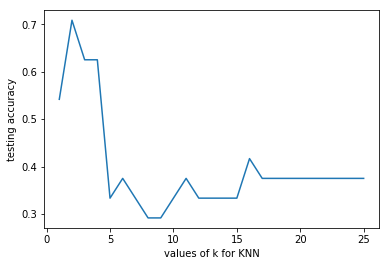

In [165]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('values of k for KNN')
plt.ylabel('testing accuracy')